# Install and Load Packages

In [1]:
!pip install econml

In [2]:
# data exploration package
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# scikit learn
from sklearn.linear_model import ElasticNetCV, LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor

# econml
from econml.dml import DML
from econml.metalearners import TLearner, SLearner, XLearner

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Load Dataset

In [3]:
# Growth Mindset dataset
GrowthMindset = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/learning_mindset/learning_mindset.csv")

# Simple Data Inspection and Exploration

In [4]:
GrowthMindset.head()

,schoolid,intervention,achievement_score,success_expect,ethnicity,gender,frst_in_family,school_urbanicity,school_mindset,school_achievement,school_ethnic_minority,school_poverty,school_size
0,76,1,0.277359,6,4,2,1,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
1,76,1,-0.449646,4,12,2,1,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
2,76,1,0.769703,6,4,2,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
3,76,1,-0.121763,6,4,2,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
4,76,1,1.526147,6,4,1,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757


In [5]:
# check email_train data structure
GrowthMindset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10391 entries, 0 to 10390
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   schoolid                10391 non-null  int64  
 1   intervention            10391 non-null  int64  
 2   achievement_score       10391 non-null  float64
 3   success_expect          10391 non-null  int64  
 4   ethnicity               10391 non-null  int64  
 5   gender                  10391 non-null  int64  
 6   frst_in_family          10391 non-null  int64  
 7   school_urbanicity       10391 non-null  int64  
 8   school_mindset          10391 non-null  float64
 9   school_achievement      10391 non-null  float64
 10  school_ethnic_minority  10391 non-null  float64
 11  school_poverty          10391 non-null  float64
 12  school_size             10391 non-null  float64
dtypes: float64(6), int64(7)
memory usage: 1.0 MB


In [6]:
# create correlation matrix
GrowthMindset.corr()

,schoolid,intervention,achievement_score,success_expect,ethnicity,gender,frst_in_family,school_urbanicity,school_mindset,school_achievement,school_ethnic_minority,school_poverty,school_size
schoolid,1.000000,-0.004182,-0.078337,0.029178,0.032320,0.006494,-0.085124,0.141227,0.000552,0.044772,-0.229099,0.121768,0.079114
intervention,-0.004182,1.000000,0.221328,0.058764,-0.006491,-0.025457,-0.045140,0.005762,-0.046095,0.027903,-0.002262,-0.011672,0.034252
achievement_score,-0.078337,0.221328,1.000000,0.438577,0.000139,-0.159343,-0.130520,0.051367,-0.110801,0.021556,0.056961,0.013696,0.059052
success_expect,0.029178,0.058764,0.438577,1.000000,-0.033818,-0.043800,-0.149084,-0.029627,-0.054207,0.074006,-0.079199,-0.052548,0.047694
ethnicity,0.032320,-0.006491,0.000139,-0.033818,1.000000,-0.017338,-0.009889,-0.000911,0.008969,0.009208,-0.040645,-0.009580,-0.033485
gender,0.006494,-0.025457,-0.159343,-0.043800,-0.017338,1.000000,0.000372,0.008840,0.015976,0.001371,0.002369,0.005535,0.005958
frst_in_family,-0.085124,-0.045140,-0.130520,-0.149084,-0.009889,0.000372,1.000000,0.030136,0.201116,-0.216939,0.153095,0.066207,-0.183997
school_urbanicity,0.141227,0.005762,0.051367,-0.029627,-0.000911,0.008840,0.030136,1.000000,0.214805,-0.201385,0.214983,0.401507,0.123807
school_mindset,0.000552,-0.046095,-0.110801,-0.054207,0.008969,0.015976,0.201116,0.214805,1.000000,-0.573798,0.253989,0.262739,-0.492287
school_achievement,0.044772,0.027903,0.021556,0.074006,0.009208,0.001371,-0.216939,-0.201385,-0.573798,1.000000,-0.478682,-0.423915,0.478073


**Tentukan mana variabel yang menjadi covariate (X), treatment (T), dan response (Y). Berikan alasan mengapa anda memilih variabel tertentu sebagai kovariat**

*   treatment (T) : Saya memilih variabel "intervention" karena definisi variabel tersebut adalah apakah siswa dididik tentang "growth mindset" atau tidak sesuai dengan soal yang untuk membuktikan bahwa mengajarkan growth mindset akan meningkatkan prestasi akademis.
*   response (Y) : Saya memilih variabel "achievement_score" karena ingin mengukur bagaimana prestasi mereka secara akademik
*   covariate (X) : Saya memilih variabel "success_expect", "school_urbanicity", "school_ethnic_minority", "school_size" karena variabel tersebut memiliki korelasi yang cukup tinggi terhadap variabel response (y)






**Tentukan model apa yang anda gunakan dan jelaskan mengapa model itu yang anda pilih (anda bebas menentukan apakah ingin menggunakan propensity score modeling, DML, atau meta-learner, cukup pilih salah satu)**

Model yang saya gunakan adalah Double Machine Learning karena hanya mengukur dampak dari intervensi secara keseluruhan bukan dari tiap unit data, type treatmentnya categorical, outcomenya binary.

# Double Machine Learning

## Data Setup

In [7]:
# outcome
y = "achievement_score"
# treatment
T = "intervention"
# covariates
X = ["success_expect", "school_urbanicity", "school_ethnic_minority", "school_size"]

## Modeling

In [8]:
# define DML Object
dml_est = DML(
    model_y = GradientBoostingRegressor(n_estimators=100, random_state = 1000),
    model_t = GradientBoostingRegressor(n_estimators=100, random_state = 1000),
    model_final = LinearRegression(fit_intercept=False),
    random_state = 1000
)

In [9]:
# fit estimator to train data
np.random.seed(1000)
dml_est.fit(GrowthMindset[y], T = GrowthMindset[T], X = GrowthMindset[X], inference="bootstrap")

In [10]:
dml_est.summary()

,point_estimate,stderr,zstat,pvalue,ci_lower,ci_upper
success_expect,0.019,0.015,1.289,0.15,-0.013,0.042
school_urbanicity,-0.001,0.013,-0.081,0.4,-0.023,0.025
school_ethnic_minority,0.003,0.019,0.158,0.47,-0.037,0.033
school_size,0.042,0.015,2.756,0.0,0.004,0.066
,point_estimate,stderr,zstat,pvalue,ci_lower,ci_upper
cate_intercept,0.303,0.085,3.557,0.0,0.155,0.467


*   success_expect berdampak positif sebesar 0.019 tetapi secara statistik tidak signifikan. Siswa yang ingin sukses di masa depan pastinya akan berusaha semaksimal mungkin agar prestasi akademiknya bagus.
*   school_urbanicity berdampak negatif sebesar -0.001 dan secara statistik tidak signifikan. Siswa yang bersekolah di pedesaan, pinggiran kota, dll berlomba untuk mendapatkan prestasi akademik yang bagus agar bisa melanjutkan ke universitas favorit tidak memandang dimana mereka bersekolah.
*   school_ethnic_minority berdampak positif sebesar 0.003 tetapi secara statistik tidak signifikan. Sekolah yang memiliki persentase siswa dari ras minoritas tinggi akan meningkatkan prestasi akademik karena tidak ada kesenjangan di sekolah antara warga minoritas dan siswa kulit putih
*   school_size berdampak positif sebesar 0.042 dan signifikan secara statistik. Karena banyaknya jumlah siswa di sekolah, siswa berlomba meningkatkan prestasi akademiknya agar mendapatkan peringkat atas.
*   Dampak dari treatmentnya positif sebesar 0.303. Siswa yang diberikan seminar tentang growth mindset akan berdampak positif pada peningkatan prestasi akademik.

In [11]:
# Get treatment effect and its confidence interval
te_pred = dml_est.effect(GrowthMindset[X])

In [12]:
# Measure price effect
np.mean(te_pred)

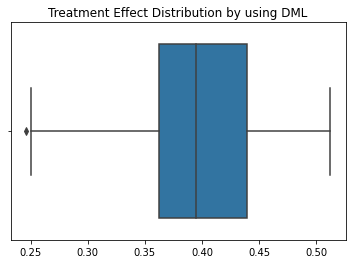

In [13]:
# check treatment effect distribution
sns.boxplot(x = te_pred).set_title("Treatment Effect Distribution by using DML");

**Analisis hasil dari model dengan mengukur dampak dari treatment**

Rata-rata dampak dari intervensi sebesar 0.40 artinya mengajarkan growth mindset akan meningkatkan prestasi akademis.